<a href="https://colab.research.google.com/github/SLMath/Credit_Score-Analysis/blob/eda_matheus/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Dados

In [391]:
import pandas as pd
import numpy as np

In [392]:
data_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/train.csv')
print(data_df.shape)
data_df.head()

(100000, 28)


<ipython-input-392-f5e0b1df3013>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [393]:
aval_df = pd.read_csv('https://github.com/SLMath/Credit_Score-Analysis/raw/main/data/test.csv')
print(aval_df.shape)
aval_df.head()

(50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


# EDA

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [395]:
data_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## Verificando dados irrelevantes para a análise

In [396]:
data_df['Customer_ID'].isna().sum()

0

In [397]:
len(data_df['Customer_ID'].unique())

12500

In [398]:
data_df['Customer_ID'].apply(lambda cust_prefix: not re.match('CUS_0x[1-9a-f][0-9a-f]*', cust_prefix)).sum()

0

O "ID" é único para cada registro, portando dispensável.

Como o "Customer_ID", "Name" e "SSN" são redundantes, manteremos apenas "Customer_ID" (verificado que não há nulos).

Vimos que existem 12500 Customers IDs diferentes, todos com prefixo 'CUS_0x' seguido de um hexadecimal

In [399]:
data_df = data_df.drop(columns= ['ID', 'Name', 'SSN'])

In [400]:
# Extraindo e transformando o hexadecimal em int, para melhorar o processamento e armazenamento dos dados
data_df['Customer_ID'] = data_df['Customer_ID'].str[4:].apply(int, base=16)
len(data_df['Customer_ID'].unique())

12500

Não houve perdas de customer ID

## Verificando tipos de dados inconsistentes

In [401]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

Os seguintes atributos estão com tipos diferentes do esperado:
- numéricos, tratados como objetos
    - Age
    - Annual_Income
    - Num_of_Loan
    - Num_of_Delayed_Payment
    - Changed_Credit_Limit
    - Outstanding_Debt
    - Credit_History_Age
    - Amount_invested_monthly
    - Monthly_Balance
- inteiro, tratados como float
    - Num_Credit_Inquiries

### Num_Credit_Inquiries

In [402]:
# Verify not int values
pd.Series( value for value in data_df['Num_Credit_Inquiries'] if not value.is_integer() ).unique()

array([nan])

### Age

In [403]:
# Verify not numerical values
data_df['Age'][ pd.to_numeric(data_df['Age'], errors='coerce', ).isna() ].unique()

array(['28_', '34_', '30_', '24_', '33_', '35_', '31_', '40_', '37_',
       '54_', '21_', '20_', '43_', '38_', '18_', '2111_', '46_', '16_',
       '19_', '47_', '53_', '25_', '27_', '55_', '42_', '48_', '49_',
       '50_', '32_', '22_', '17_', '29_', '15_', '51_', '26_', '39_',
       '14_', '36_', '44_', '7670_', '45_', '23_', '41_', '52_', '733_',
       '5769_', '4383_', '56_', '2650_', '3307_', '6962_', '5589_',
       '6556_', '1447_', '8153_', '3834_', '6744_', '6471_', '7723_',
       '7640_', '6408_', '3502_', '7316_', '1102_', '8669_', '2463_',
       '6666_', '3055_', '1248_', '2220_', '2159_', '4583_', '3988_',
       '2155_', '6770_', '1843_', '1367_', '3742_', '2171_', '5109_',
       '3984_', '2474_', '5046_', '7715_', '2329_', '707_', '844_',
       '2756_', '2037_', '902_', '8523_', '3640_', '3998_', '3712_',
       '2097_', '8348_', '5373_', '3291_', '2994_', '3339_', '2812_',
       '3578_', '3564_', '1794_', '737_', '4301_', '2846_', '2373_',
       '1188_', '8207

In [404]:
# remove "_" at the end and convert to a number
data_df['Age'] = data_df['Age'].str.replace('_', '').astype(int)
data_df['Age']

0         23
1         23
2       -500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

In [405]:
# Apply the same for other columns
remove_underline_cols = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Credit_History_Age',
    'Amount_invested_monthly',
    'Monthly_Balance'
]
for col in remove_underline_cols:
    data_df[col] = data_df[col].str.replace('_', '')
    try:
        data_df[col] = data_df[col].apply(float)
    except:
        pass

data_df[remove_underline_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            100000 non-null  float64
 1   Num_of_Loan              100000 non-null  float64
 2   Num_of_Delayed_Payment   92998 non-null   float64
 3   Changed_Credit_Limit     100000 non-null  object 
 4   Outstanding_Debt         100000 non-null  float64
 5   Credit_History_Age       90970 non-null   object 
 6   Amount_invested_monthly  95521 non-null   float64
 7   Monthly_Balance          97132 non-null   float64
dtypes: float64(6), object(2)
memory usage: 6.1+ MB


2 colunas ainda precisam de tratamento:
1. Changed_Credit_Limit
2. Credit_History_Age

### Changed_Credit_Limit

In [406]:
# Verify not numerical values
data_df['Changed_Credit_Limit'][ pd.to_numeric(data_df['Changed_Credit_Limit'], errors='coerce', ).isna() ].unique()

array([''], dtype=object)

In [407]:
# Tratar dados faltantes como nulos
data_df['Changed_Credit_Limit'] = pd.to_numeric(data_df['Changed_Credit_Limit'], errors='coerce')
data_df['Changed_Credit_Limit']

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

### Credit_History_Age

In [408]:
# Verify not numerical values
data_df['Credit_History_Age'][ pd.to_numeric(data_df['Credit_History_Age'], errors='coerce', ).isna() ].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [409]:
# Verificar o formato:
formato_age = '\d+ Years and \d+ Months'
np.any(
    data_df['Credit_History_Age']\
    .dropna()\
    .apply(lambda value: not re.match(formato_age, value))
)

False

In [410]:
# Transformar texto em numero de meses
def extract_number_months(years_months_str):
    y, m = np.array(years_months_str.split('-')).astype(int)
    return y * 12 + m

# Transform: '{y} Years and {m} Months' into '{y}-{m}', and then apply extract_number_months
data_df['Credit_History_Age'] = data_df['Credit_History_Age']\
    .dropna()\
    .str.replace(' Years and ', '-')\
    .str.replace(' Months', '')\
    .apply(extract_number_months)

data_df['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

### Month: text to number

In [411]:
# assumindo que todos os dados são do mesmo ano, transformaremos a coluna de meses
# para numerica para permitir ordenação.
# OBS: não usaremos datatime pois ele requer uma data, e não temos ano
mapa_meses = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8
}

data_df['Month'] = data_df['Month'].map(mapa_meses)
data_df['Month']

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64

## Tratar Dados Nulos

Verificar contagem de dados nulos (faltantes/NaN)

In [412]:
na_data = data_df.isna().sum()
na_data[na_data > 0]

Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             2868
dtype: int64

In [413]:
print(f'porcentagem de dados nulos: { na_data.sum() / len(data_df) :.1%}')
print(f'porcentagem de registros com algum dado nulo: { np.any(data_df.isna(), axis= 1).sum() / len(data_df) :.1%}')

porcentagem de dados nulos: 53.8%
porcentagem de registros com algum dado nulo: 43.3%


Como a porcentagem de registros é muita alta, vamos tentar preencher dados nulos.

Seguiremos a ordem das colunas pela contagem de nulos.


#### Monthly_Inhand_Salary

In [414]:
# Monthly_Inhand_Salary might be filled with data from same customer
len( data_df.dropna(subset= 'Monthly_Inhand_Salary')['Customer_ID'].unique() )

12500

In [415]:
# Since all 12500 have at least a single not null value, we can use this value to
# estimate the missing data

# Primeiro, tentamos preencher os dados com o valor encontrado no mes anterior, mas
# isso pode falhar caso o primeiro mes esteja nulo
fill_salary_forward = data_df.sort_values('Month').groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(
    lambda salary_group: salary_group.fillna(method= 'ffill')
).sort_index()
filled_salary = data_df['Monthly_Inhand_Salary'].fillna(fill_salary_forward)

filled_salary[filled_salary.isna()]

40      NaN
56      NaN
104     NaN
128     NaN
168     NaN
         ..
99816   NaN
99817   NaN
99888   NaN
99928   NaN
99944   NaN
Name: Monthly_Inhand_Salary, Length: 2196, dtype: float64

In [416]:
# analyze these data, to see if they were unemployed or some other reason for missing data
data_df[fill_salary_forward.isna()]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
40,38382,1,31,Lawyer,73928.460,NaN,4,1288,8,0.0,...,Good,548.20,39.962685,NaN,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good
56,21511,1,7580,Media_Manager,34081.380,NaN,8,7,15,3.0,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
104,27750,1,39,Manager,8701.545,NaN,6,5,32,7.0,...,_,2602.69,24.523164,107.0,Yes,36.548197,13.066210,Low_spent_Large_value_payments,272.298468,Poor
128,24688,1,20,Accountant,92047.080,NaN,6,7,16,0.0,...,Standard,1296.64,37.115615,350.0,Yes,0.000000,154.634123,!@9#%8,854.524877,Standard
168,41326,1,41,Media_Manager,10183.015,NaN,7,5,17,5.0,...,Bad,1672.43,25.951273,121.0,Yes,37.588073,14.622739,High_spent_Large_value_payments,295.247646,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99816,16557,1,19,Scientist,65858.480,NaN,7,7,30,5.0,...,Standard,2344.57,28.744030,76.0,Yes,261.201218,91.928818,High_spent_Medium_value_payments,NaN,Poor
99817,16557,2,19,Scientist,65858.480,NaN,7,7,30,5.0,...,Standard,2344.57,38.218221,NaN,Yes,261.201218,165.236290,High_spent_Medium_value_payments,NaN,Poor
99888,35242,1,38,Manager,85744.120,NaN,6,7,11,2.0,...,Standard,717.79,27.777284,183.0,Yes,72.099176,160.090877,High_spent_Large_value_payments,NaN,Standard
99928,45340,1,38,Manager,15319.650,NaN,6,7,15,4.0,...,Bad,1453.61,36.518222,129.0,Yes,28.182033,167.888435,Low_spent_Small_value_payments,NaN,Poor


In [417]:
# since Annual_Income is a valid value, let's procced using backward propagation
fill_salary_backward = data_df.sort_values('Month').groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(
    lambda salary_group: salary_group.fillna(method= 'bfill')
).sort_index()
filled_salary = filled_salary.fillna(fill_salary_backward)

filled_salary[filled_salary.isna()]

Series([], Name: Monthly_Inhand_Salary, dtype: float64)

In [418]:
data_df['Monthly_Inhand_Salary'] = filled_salary
data_df['Monthly_Inhand_Salary'].isna().sum()

0

#### Using Customer_ID to fill "customer-constante" columuns


In [419]:
# Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries can be set the same way
cust_cte_cols = ['Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
for col in cust_cte_cols:
    print(col, len( data_df.dropna(subset= col)['Customer_ID'].unique() ))

Type_of_Loan 11074
Num_of_Delayed_Payment 12500
Num_Credit_Inquiries 12500


Type_of_Loan não vai ser completamente preenchida, mas as outras duas sim


In [420]:
cust_cte_fill_forward = data_df.sort_values('Month').groupby('Customer_ID')[cust_cte_cols].transform(
    lambda salary_group: salary_group.fillna(method= 'ffill')
).sort_index()
filled_cust_cte_cols = data_df[cust_cte_cols].fillna(cust_cte_fill_forward)
filled_cust_cte_cols.isna().sum()

Type_of_Loan              11408
Num_of_Delayed_Payment      927
Num_Credit_Inquiries        241
dtype: int64

In [421]:
cust_cte_fill_backward = data_df.sort_values('Month').groupby('Customer_ID')[cust_cte_cols].transform(
    lambda salary_group: salary_group.fillna(method= 'bfill')
).sort_index()
filled_cust_cte_cols = filled_cust_cte_cols.fillna(cust_cte_fill_backward)
filled_cust_cte_cols.isna().sum()

Type_of_Loan              11408
Num_of_Delayed_Payment        0
Num_Credit_Inquiries          0
dtype: int64

In [422]:
data_df[cust_cte_cols] = filled_cust_cte_cols

#### Type_of_Loan

In [423]:
# Verificar se houve um número positivos de emprestimo para os dados vazios em Type_of_Loan
data_df.query('Type_of_Loan.isnull()')['Num_of_Loan'].unique()

array([   0., -100.,  501., 1035., 1347.,  193., 1451.,  995.,  654.,
        153.,  911., 1369.,  143., 1416.,  238., 1070., 1444.,  103.,
        172.,  252.,  330.,  394., 1227.,  859.,  336.,   50.,  940.,
       1447.,  881.,  538.,  999.,  831., 1384.,  621., 1419., 1430.,
       1382.,  437.,  372.,  126., 1074.,  288.,  378.,  652.,   33.,
        439., 1296.,  773.,  415.,  275.,  350.,  507., 1129., 1027.,
        897.,  546.,  215., 1478.,   83.,   18.,  801.])

In [424]:
# Como existe um tipo de empréstimo "Not Specified", vamos usar esse tipo nos
# casos em que houve algum empréstimo, mas estão com tipo nulo
not_specified_loans = data_df.query('Num_of_Loan > 0')['Type_of_Loan'].fillna("Not Specified")
data_df['Type_of_Loan'] = data_df['Type_of_Loan'].fillna(not_specified_loans)

data_df.query('Type_of_Loan.isnull()')['Num_of_Loan'].unique()

array([   0., -100.])

#### Changed_Credit_Limit

In [425]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Changed_Credit_Limit')['Customer_ID'].unique() )

12500

In [426]:
# Como todos possuem, podemos analisar os valores para entender como melhor preenche-los
data_df.query('Changed_Credit_Limit.isnull()').groupby('Customer_ID')['Changed_Credit_Limit'].size().sort_values(ascending= False)

Customer_ID
28666    3
16173    3
45946    3
46029    3
49454    3
        ..
18410    1
18395    1
18354    1
18325    1
50996    1
Name: Changed_Credit_Limit, Length: 1960, dtype: int64

In [427]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 28666].Changed_Credit_Limit

96000    19.95
96001    19.95
96002    19.95
96003      NaN
96004    19.95
96005      NaN
96006      NaN
96007    19.95
Name: Changed_Credit_Limit, dtype: float64

In [428]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 46029].Changed_Credit_Limit

7760    2.41
7761    9.41
7762    2.41
7763     NaN
7764     NaN
7765    2.41
7766    2.41
7767     NaN
Name: Changed_Credit_Limit, dtype: float64

In [429]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 18325].Changed_Credit_Limit

28832     NaN
28833    3.66
28834    3.66
28835    3.66
28836    3.66
28837    3.66
28838    3.66
28839    8.66
Name: Changed_Credit_Limit, dtype: float64

In [430]:
# vamos substituir nulos pela moda
data_df['Changed_Credit_Limit'] = data_df['Changed_Credit_Limit'].fillna(
    data_df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(
        lambda limits: limits.value_counts().index[0]
    )
)
data_df['Changed_Credit_Limit'].isna().sum()

0

In [431]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 46029].Changed_Credit_Limit

7760    2.41
7761    9.41
7762    2.41
7763    2.41
7764    2.41
7765    2.41
7766    2.41
7767    2.41
Name: Changed_Credit_Limit, dtype: float64

In [432]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 18325].Changed_Credit_Limit

28832    3.66
28833    3.66
28834    3.66
28835    3.66
28836    3.66
28837    3.66
28838    3.66
28839    8.66
Name: Changed_Credit_Limit, dtype: float64

#### Credit_History_Age

In [433]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Credit_History_Age')['Customer_ID'].unique() )

12500

In [434]:
# Como todos possuem, podemos analisar os valores para entender como melhor preenche-los
data_df.query('Credit_History_Age.isnull()').groupby('Customer_ID')['Credit_History_Age'].size().sort_values(ascending= False)

Customer_ID
1161     5
14528    5
36934    4
38958    4
41768    4
        ..
20436    1
20434    1
20425    1
20417    1
50996    1
Name: Credit_History_Age, Length: 6650, dtype: int64

In [435]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 1161].Credit_History_Age

18088      NaN
18089      NaN
18090      NaN
18091    202.0
18092      NaN
18093    204.0
18094    205.0
18095      NaN
Name: Credit_History_Age, dtype: float64

In [436]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 41768].Credit_History_Age

67520      NaN
67521    190.0
67522    191.0
67523      NaN
67524    193.0
67525      NaN
67526      NaN
67527    196.0
Name: Credit_History_Age, dtype: float64

In [437]:
# Esse valor foi convertido para unidade meses, então deve incrementar um para cada mes que passa
def fill_sequential_months(cust_months):
    # encontrar o primeiro valor nao nulo e qual a posicao relativa nesse df
    idx, months_1st = cust_months.reset_index(drop= True).reset_index().dropna().iloc[0]
    idx = int(idx)
    # preencher os meses anteriores ao idx-ésimo
    for prev_month in range(idx):
        cust_months.iloc[prev_month] = (months_1st - idx) + prev_month
    # preencher os restantes
    for next_month in range(idx + 1, len(cust_months)):
        if np.isnan(cust_months.iloc[next_month]):
            cust_months.iloc[next_month] = cust_months.iloc[next_month - 1] + 1
    return cust_months

data_df['Credit_History_Age'] = data_df\
    .sort_values('Month')\
    .groupby('Customer_ID')\
    ['Credit_History_Age']\
    .transform(fill_sequential_months)\
    .sort_index()\
    .astype(int)

In [438]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 1161].Credit_History_Age

18088    199
18089    200
18090    201
18091    202
18092    203
18093    204
18094    205
18095    206
Name: Credit_History_Age, dtype: int64

In [439]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 41768].Credit_History_Age

67520    189
67521    190
67522    191
67523    192
67524    193
67525    194
67526    195
67527    196
Name: Credit_History_Age, dtype: int64

#### Amount_invested_monthly

In [440]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Amount_invested_monthly')['Customer_ID'].unique() )

12500

In [441]:
# Como todos possuem, podemos analisar os valores para entender como melhor preenche-los
data_df.query('Amount_invested_monthly.isnull()').groupby('Customer_ID')['Amount_invested_monthly'].size().sort_values(ascending= False)

Customer_ID
40980    5
46914    5
1208     4
18561    4
41073    4
        ..
19179    1
19182    1
19186    1
19188    1
50999    1
Name: Amount_invested_monthly, Length: 3826, dtype: int64

In [442]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 40980].Amount_invested_monthly

84704           NaN
84705           NaN
84706           NaN
84707    564.108804
84708           NaN
84709     99.750397
84710    141.758313
84711           NaN
Name: Amount_invested_monthly, dtype: float64

In [443]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 41073].Amount_invested_monthly

71536           NaN
71537           NaN
71538    241.540815
71539    144.303889
71540     98.610824
71541    193.409058
71542           NaN
71543           NaN
Name: Amount_invested_monthly, dtype: float64

In [444]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 50999].Amount_invested_monthly

54216    181.794817
54217     48.317366
54218           NaN
54219    164.378342
54220    409.776140
54221    139.176062
54222    479.772459
54223    692.178202
Name: Amount_invested_monthly, dtype: float64

In [445]:
# Como os valores tem alguns extremos, usaremos a mediana por ser mais robusta que
# a média quanto a outliers
data_df['Amount_invested_monthly'] = data_df['Amount_invested_monthly'].fillna(
    data_df.sort_values('Month')\
    .groupby('Customer_ID')\
    ['Amount_invested_monthly']\
    .transform('median')
)

In [446]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 40980].Amount_invested_monthly

84704    141.758313
84705    141.758313
84706    141.758313
84707    564.108804
84708    141.758313
84709     99.750397
84710    141.758313
84711    141.758313
Name: Amount_invested_monthly, dtype: float64

In [447]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 41073].Amount_invested_monthly

71536    168.856474
71537    168.856474
71538    241.540815
71539    144.303889
71540     98.610824
71541    193.409058
71542    168.856474
71543    168.856474
Name: Amount_invested_monthly, dtype: float64

In [448]:
# caso exemplo 3
data_df[data_df['Customer_ID'] == 50999].Amount_invested_monthly

54216    181.794817
54217     48.317366
54218    181.794817
54219    164.378342
54220    409.776140
54221    139.176062
54222    479.772459
54223    692.178202
Name: Amount_invested_monthly, dtype: float64

#### Monthly_Balance

In [449]:
# Verifica quantos customers tem pelo menos um valor de 'Changed_Credit_Limit'
len( data_df.dropna(subset= 'Monthly_Balance')['Customer_ID'].unique() )

12288

In [450]:
# Nem todos possuem, mas podemos analisar os valores para entender como melhor preenche-los
# Primeiro os que possuem algum dado
missing_monthly_balance = data_df.query('Monthly_Balance.isnull()').groupby('Customer_ID')['Monthly_Balance'].size().sort_values(ascending= False)
missing_monthly_balance[missing_monthly_balance < 8]

Customer_ID
50162    5
4744     4
40312    4
38256    4
25740    4
        ..
22901    1
23199    1
23265    1
23362    1
50904    1
Name: Monthly_Balance, Length: 937, dtype: int64

In [451]:
# caso exemplo 1
data_df[data_df['Customer_ID'] == 4744].Monthly_Balance

944    231.525401
945           NaN
946           NaN
947    192.657122
948           NaN
949    259.430556
950           NaN
951    269.716274
Name: Monthly_Balance, dtype: float64

In [452]:
# caso exemplo 2
data_df[data_df['Customer_ID'] == 23199].Monthly_Balance

10640    103.798722
10641    479.939220
10642    463.369587
10643    545.084560
10644     31.163136
10645    133.944502
10646     70.225105
10647           NaN
Name: Monthly_Balance, dtype: float64

In [453]:
# Como os valores também tem alguns extremos, usaremos a mediana por ser mais robusta que
# a média quanto a outliers
data_df['Monthly_Balance'] = data_df['Monthly_Balance'].fillna(
    data_df.sort_values('Month')\
    .groupby('Customer_ID')\
    ['Monthly_Balance']\
    .transform('median')
)

In [454]:
# Agora os sem dados
data_df.merge(missing_monthly_balance[missing_monthly_balance == 8], on= 'Customer_ID')

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance_x,Credit_Score,Monthly_Balance_y
0,46039,1,19,Teacher,16809.56,1686.796667,7,10,21,5.0,...,1790.93,29.600846,69,Yes,38.650760,97.549516,Low_spent_Small_value_payments,NaN,Poor,8
1,46039,2,19,Teacher,16809.56,1686.796667,7,10,21,5.0,...,1790.93,22.649438,70,Yes,38.650760,96.660087,Low_spent_Large_value_payments,NaN,Poor,8
2,46039,3,19,Teacher,16809.56,1686.796667,7,10,21,5.0,...,1790.93,30.443484,71,Yes,38.650760,96.660087,Low_spent_Small_value_payments,NaN,Poor,8
3,46039,4,19,Teacher,8810368.00,1686.796667,7,10,21,5.0,...,1790.93,34.752306,72,Yes,38.650760,63.665192,High_spent_Small_value_payments,NaN,Standard,8
4,46039,5,19,Teacher,16809.56,1686.796667,7,10,21,5.0,...,1790.93,28.533922,73,Yes,38.650760,143.469938,Low_spent_Large_value_payments,NaN,Standard,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,37932,4,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,502.38,34.663572,378,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor,8
1692,37932,5,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,502.38,40.565631,379,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor,8
1693,37932,6,25,Mechanic,39628.99,3359.415833,4,6,5729,2.0,...,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor,8
1694,37932,7,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,502.38,33.638208,381,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard,8


Nao observamos nada util, mas podemos seguir com algumas abordagens:
- inputar a mediana/média do valor da coluna
- inputar a mediana/média com base em grupos, por exemplo pela Occupation
- remover essas linhas
- remover a coluna

Como essas linhas representam menos de 2% dos dados, vamos optar por eliminá-las.

## Explorando e Tratando dados

In [455]:
data_df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [456]:
data_df.drop(columns= ['Customer_ID', 'Month']).describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,100000.0,NaN,NaN,NaN,110.6497,686.244717,-500.0,24.0,33.0,42.0,8698.0
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.0,NaN,NaN,NaN,176415.701298,1429618.051414,7005.93,19457.5,37578.61,72790.92,24198062.0
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,4198.771619,3187.494355,303.645417,1626.761667,3096.378333,5961.745,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,100000.0,NaN,NaN,NaN,22.47443,129.05741,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,100000.0,NaN,NaN,NaN,72.46604,466.422621,1.0,8.0,13.0,20.0,5797.0
Num_of_Loan,100000.0,NaN,NaN,NaN,3.00996,62.647879,-100.0,1.0,3.0,5.0,1496.0
Type_of_Loan,88653,6260,Not Specified,1469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,100000.0,NaN,NaN,NaN,21.06878,14.860104,-5.0,10.0,18.0,28.0,67.0


### Corrigindo os limites de Age

In [457]:
# o minimo é -500 e o máximo 8698, certamente valores errados
data_df.query('Age < 0 or Age > 100')

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,3392,3,-500,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
56,21511,1,7580,Media_Manager,34081.38,2611.115000,8,7,15,3.0,...,Standard,1704.18,24.448063,175,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
113,4084,2,-500,Entrepreneur,25546.26,2415.855000,8,7,14,5.0,...,Standard,758.44,29.711376,219,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
122,13266,3,181,Scientist,31993.78,2942.148333,6,6,7,2.0,...,Standard,818.22,27.380109,204,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard
219,16092,4,995,Accountant,43070.24,3622.186667,3,3,18,1.0,...,Standard,1233.10,24.331772,233,Yes,30.576085,74.920375,High_spent_Medium_value_payments,506.722207,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,5657,2,2263,Media_Manager,20059.98,1523.665000,8,5,12,4.0,...,Good,909.01,25.982154,196,No,45.076827,74.713580,High_spent_Small_value_payments,NaN,Poor
99937,44367,2,-500,_______,22620.79,1722.065833,7,3,9,0.0,...,Standard,642.46,31.841872,352,No,0.000000,105.076293,Low_spent_Large_value_payments,NaN,Standard
99950,20915,7,1342,Media_Manager,59146.36,4908.863333,3,6,6,1.0,...,_,418.03,38.199635,247,No,26.778419,502.376320,Low_spent_Small_value_payments,NaN,Standard
99963,14124,4,-500,Lawyer,42903.79,3468.315833,0,4,6,1.0,...,Good,1079.48,30.625298,340,No,34.975457,31.193919,High_spent_Large_value_payments,NaN,Standard


In [458]:
# Vamos usar o Customer_ID para corrigir esses valores
data_df.loc[(data_df.Age < 0) | (data_df.Age > 100), 'Age'] = np.nan
data_df['Age'] = data_df['Age'].fillna(
    data_df.groupby('Customer_ID')['Age'].transform('median')
)

data_df.query('Age < 0 or Age > 100')

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [459]:
range_cust_age = data_df.groupby('Customer_ID')['Age'].apply(lambda ages: ages.max() - ages.min())
range_cust_age[range_cust_age > 1]

Customer_ID
3528     44.0
7635     71.0
15258    68.0
32404    63.0
49738    68.0
Name: Age, dtype: float64

In [460]:
weird_age_cID = [
    3528,
    7635,
    15258,
    32404,
    49738
]
data_df[data_df['Customer_ID'].apply(lambda id: id in weird_age_cID)][['Customer_ID', 'Age']].value_counts()

Customer_ID  Age  
3528         51.0     7
7635         24.0     7
15258        32.0     7
32404        32.0     7
49738        31.0     7
3528         95.0     1
7635         95.0     1
15258        100.0    1
32404        95.0     1
49738        99.0     1
dtype: int64

In [461]:
# Podemos traçar uma divida em 90
data_df.loc[data_df['Customer_ID'].apply(lambda id: id in weird_age_cID) & ( data_df.Age > 90 ), 'Age'] = np.nan
data_df['Age'] = data_df['Age'].fillna(
    data_df.groupby('Customer_ID')['Age'].transform('median')
)

data_df[data_df['Customer_ID'].apply(lambda id: id in weird_age_cID)][['Customer_ID', 'Age']].value_counts()

Customer_ID  Age 
3528         51.0    8
7635         24.0    8
15258        32.0    8
32404        32.0    8
49738        31.0    8
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

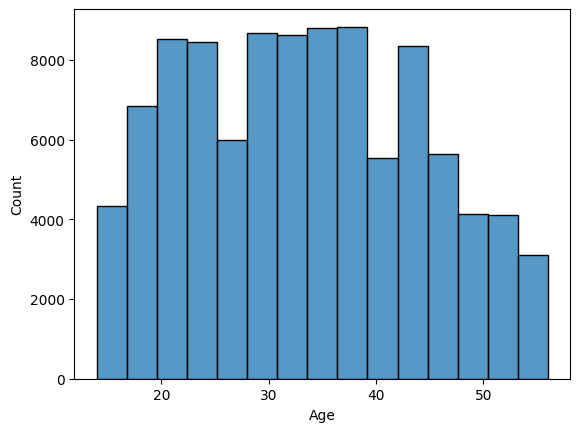

In [388]:
# Agora sim podemos ver a distribuição das idades
sns.histplot(data= data_df, x= 'Age', bins= 15)

Parecem bem distribuídas as idades.

### Tratando valores multiplos na coluna Type_of_Loan

In [226]:
data_df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [227]:
tipos_emprestimo = np.unique([
    texto
    for lista_texto in pd.Series(data_df['Type_of_Loan'].dropna().unique())\
        .str.replace(', and', ',')\
        .str.split(', ')
    for texto in lista_texto
])
tipos_emprestimo

array(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified',
       'Payday Loan', 'Personal Loan', 'Student Loan'], dtype='<U23')

In [228]:
data_df[tipos_emprestimo] = data_df['Type_of_Loan'].dropna().apply(
    lambda valor:
        pd.Series([
            tipo in valor for tipo in tipos_emprestimo
        ], index= tipos_emprestimo)
).astype(int)
data_df = data_df.drop(columns= 'Type_of_Loan')

data_df[tipos_emprestimo]

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Modelos